# Исследование объявлений о продаже квартир в Санкт-Петербурге

**Цель исследования** -  провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 

**Исходные данные** - данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Вопросы, интересующие заказчика:**
1. Как быстро продавались квартиры?
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Какая средняя стоимость квартир в 10 населенных пунктах с наибольшим числом объявлений?
4. Как стоимость объекта зависит от расстояния до центра города?
5. Какие закономерности 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку *pandas*, откроем данный нам файл с таблицей и посмотрим типы данных и кол-во ненулевых значений.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

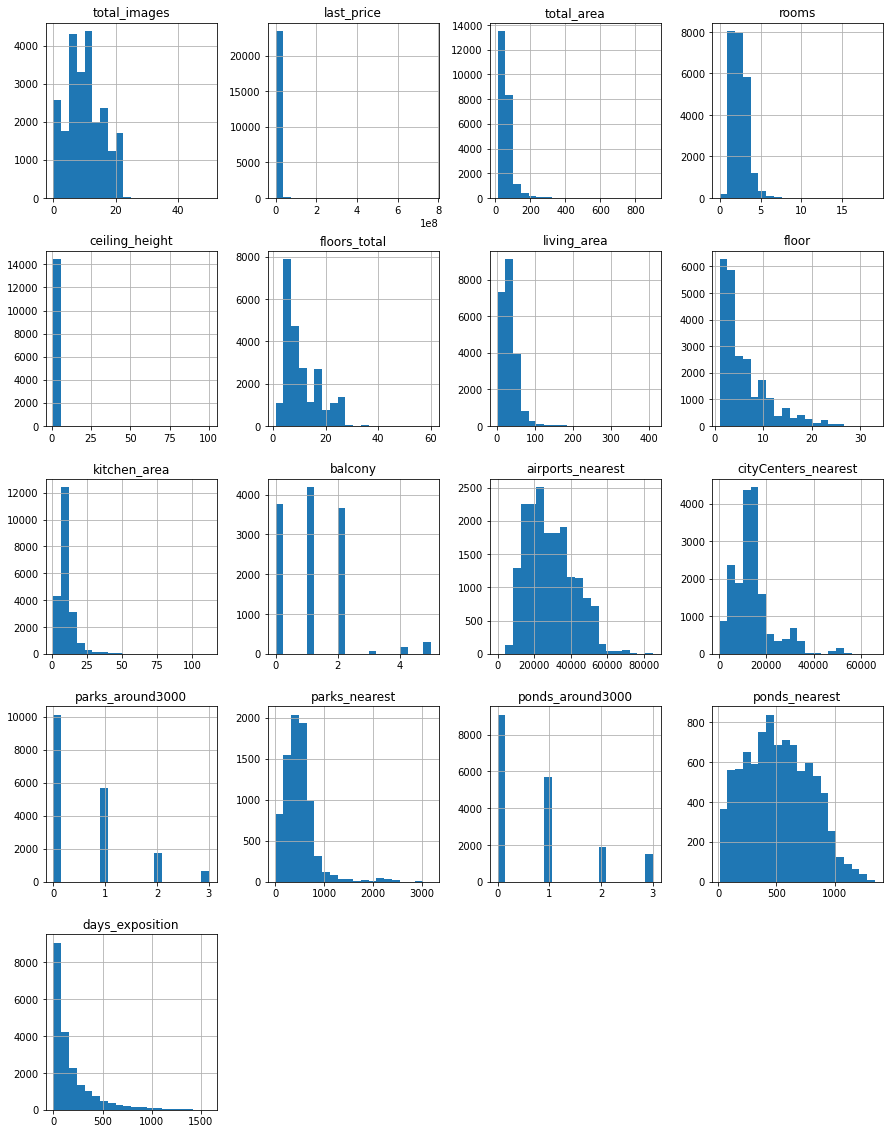

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#выведем первые 5 строк датафрейма
pd.set_option('display.max_columns', None)
display(data.head(10))
#смотрим типы данных и кол-во ненулевых значений
data.info()
#найдем количество дубликатов
print('\nЧисло дубликатов:', data.duplicated().sum())
#построим гистограмму для всех числовых столбцов датафрейма
data.hist(grid=True, figsize=(15, 20), bins=20)
plt.show()

**Изучив полученную информацию, выявили следующее:**

- всего в датафрейме 23699 строк и 22 столбца;
- дубликатов нет;
- в столбцах *ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, days_exposition* присутствуют пропуски;
- в столбцах *floors_total, balcony, parks_around3000, ponds_around3000, days_exposition* неверно определены типы данных (вместо типа float должен быть тип int, т.к. количество этажей, балконов, парков, водоемов и дней можно выразить только целым числом);
- в столбце *first_day_exposition* тип данных должен быть определен как datetime, а не object;
- в столбце *is_apartment* тип данных должен быть определен как bool, а не object.

### Предобработка данных

Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов.

In [3]:
#определим более наглядно в каких столбцах есть пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменим пропуски и типы данных в некоторых столбцах.**

In [4]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [5]:
# Выясняем количество значений в столбце is_apartment. Всего аппартаменты - 50.
print(data['is_apartment'].value_counts())
#Заменяем пропущенные значения на False
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

False    2725
True       50
Name: is_apartment, dtype: int64


In [6]:
#заменим тип данных в days_exposition
print(data['days_exposition'].value_counts())
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64


In [7]:
#смотрим есть ли аномальные значения в столбце balcony
print(data['balcony'].value_counts())
#заменим пропуски в balcony на 0 и заменим тип данных
data['balcony'] = data['balcony'].fillna(0).astype(int)

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [8]:
#заменим пропуски в parks_around3000 на 0 (т.к. скорее всего рядом не имеется парков) и заменим тип данных
print(data['parks_around3000'].value_counts())
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


In [9]:
#заменим пропуски в ponds_around3000 на 0 (т.к. скорее всего рядом не имеется водоемов) и заменим тип данных
print(data['ponds_around3000'].value_counts())
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


In [10]:
#изменим last_price на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype(int)

In [11]:
#посмотрим данные с пропущенными значениями в floors_total - ничего общего между ними нет
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197.0,12373.0,1,123.0,0,NaN,49
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,251
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2,309.0,2,706.0,727
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,123
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,False,False,NaN,0,Санкт-Петербург,51340.0,15363.0,0,NaN,1,853.0,512
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,False,False,14.40,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,127
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,False,False,23.42,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,260
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,104


In [12]:
#т.к. пропусков очень мало. строки можно удалить, на конечный результат это не повлияет
data.dropna(subset=['floors_total'], inplace=True)
#заменяем тип данных в столбце floors_total на целочисленный
data['floors_total'] = data['floors_total'].astype(int)

<AxesSubplot:ylabel='Frequency'>

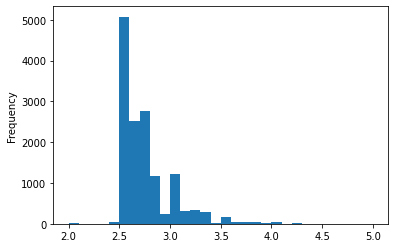

In [13]:
#посмотрим значения в столбце ceiling_height
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2, 5))

In [14]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что есть аномальные значения высоты потолков (выше 4 метров). Среднее значение высоты потолков не сильно отличается от медианного значения. В связи с чем аномальные значения можно пока оставить как есть. Но заменить пропуски лучше медианным значением, т.к. оно более устойчиво к выбросам.

In [16]:
#заменяем пропуски в столбце ceiling_height медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Заполним пропуски в столбце living_area. Для рассчитаем средний процент жилой площади от среднего значения общей площади по всей выборке. На основании этого расчитаем жилую площадь в каждой строке с пропусками.

In [17]:
#расчитаем средний процент жилой площади от среднего значения общей площади
living_pct = data['living_area'].mean() / data['total_area'].mean()
#заполняем пропуски
data['living_area'].fillna(living_pct * data['total_area'], inplace=True)

Таким же образом заменяем пропуски в столбце kitchen_area.

In [18]:
#расчитаем средний процент площади кухни от среднего значения общей площади
kitchen_pct = data['kitchen_area'].mean() / data['total_area'].mean()
#заполняем пропуски
data['kitchen_area'].fillna(kitchen_pct * data['total_area'], inplace=True)

Рассмотрим уникальные значения в столбце locality_name.

In [19]:
#выведем уникальные значения в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что у нас есть населенные пункты типа "посёлок" и "поселок" - здесь могут обнаружиться дубликаты. Поэтому заменим букву "ё" на букву "е". Так же заменим "посе(ё)лок городского типа" и "городской посе(ё)лок" на "поселок".

In [20]:
#произведем замену дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок городского типа', 'городской поселок', 'городской посёлок'], 'поселок', 
             regex=True)
)

Теперь удалим пропуски в столбце с названиями населенных пунктов, т.к. их очень мало и избавление от них никак не повлияет на конечные результаты исследования.

In [21]:
#удаляем пропуски
data.dropna(subset=['locality_name'], inplace=True)

Проверим количество пропусков после обработки.

In [22]:
#проверяем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Итак, в данном разделе мы произвели обработку данных предоставленного датафрейма. 

Выявили пропуски в столбцах balcony, parks_around3000, ponds_around3000 и заменили их на 0, т.к. количество парков, водоемов и балконов не указано продавцом, в связи с тем, что их нет. В столбце days_exposition пропуски решили оставить, т.к. эти объявления еще не сняты и квартира не продана. В столбце is_apartment произвели замену пропусков на False, потому что, апартаменты, скорее всего, появились в нашем списке совсем недавно, относительно остальных данных. В столбце с общим количеством этажей выявленные пропуски было решено удалить, т.к. их очень мало и на результат исследования это не повлияет. Пропуски в столбце с высотой потолков заменили медианным значением, т.к. нашли в нем некоторое количество аномальных значений, а медиана более устойчива к выбросам. В столбцах living_area и kitchen area произвели замену пропусков, рассчитав жилую площадь и площадь кухни на основании среднего процента жилой площади и кухни, соответственно, от общей площади.

Произвели замену типа данных в столбце first_day_exposition со строчного на datetime для удобства дальнейших расчетов. Столбцы floors_total, balcony, parks_around3000, ponds_around3000, days_exposition привели к типу int, т.к. эти данные выражаются только целыми числами. Столбец is_apartment привели к типу bool,вместо object.

В столбце с названиями населенных пунктов нашли дубликаты, произвели их замену и пропуски решили удалить, в связи с малым количеством.

### Посчитаем и добавим в таблицу новые столбцы

В таблицу добавим следующие столбцы:
- цена одного квадратного метра (square_meter_price);
- день недели публикации объявления (exposition_weekday);
- месяц публикации объявления (exposition_month);
- год публикации объявления (exposition_year);
- тип этажа квартиры (floor_type);
- расстояние до центра города в км (city_center_distance).

In [23]:
#расчитаем цену за один квадратный метр и добавим новый столбец
data['square_meter_price'] = data['last_price'] / data['total_area']
#округляем полученную цену за квадратный метр до двух знаков после запятой
data['square_meter_price'] = data['square_meter_price'].round(2)

In [24]:
#добавим столбец, где укажем день недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

In [25]:
#добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

In [26]:
#добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

Для того, чтобы добавить столбец с типом этажа, сначала необходимо их категоризировать. Для этого создадим функцию для категоризации этажей на "первый", "последний" и "другие".

In [27]:
#создадим функцию для категоризации этажей
def floor_type(f):
    floor = f['floor']
    floors_total = f['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#добавим столбец с типом этажа, применив функцию с категоризацией к каждой строке датафрейма
data['floor_type'] = data.apply(floor_type, axis=1)

Добавим столбец с расстоянием до центра города в километрах.

In [28]:
#добавим столбец с расстоянием до центра города в км, для этого переводим расстояние в км и округляем до целого значения
data['city_center_distance'] = (data['cityCenters_nearest'] / 1000).round()

**Вывод:**

Для удобства дальнейшего исследования в наш датафрейм добавили следующие столбцы:
- цена одного квадратного метра (square_meter_price);
- день недели публикации объявления (exposition_weekday);
- месяц публикации объявления (exposition_month);
- год публикации объявления (exposition_year);
- тип этажа квартиры (floor_type);
- расстояние до центра города в км (city_center_distance).

### Исследовательский анализ данных

####  Изучение параметров

Изучим следующие параметры:
- общая площадь; 
- жилая площадь; 
- площадь кухни; 
- цена объекта; 
- количество комнат; 
- высота потолков; 
- тип этажа квартиры («первый», «последний», «другой»); 
- общее количество этажей в доме; -
- расстояние до центра города в метрах; 
- расстояние до ближайшего парка. 

**Изучим общую площадь.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения общей площади больше 200 метров квадратных.

In [29]:
#посчитаем количество аномальных значений общей площади более 200 кв. метров
(data['total_area'] > 200).value_counts()

False    23339
True       226
Name: total_area, dtype: int64

Видим, что таких значений всего 226. Поэтому можем от них избавиться.

In [30]:
#удаляем аномальные значения
data = data[(data['total_area'] <= 200)]

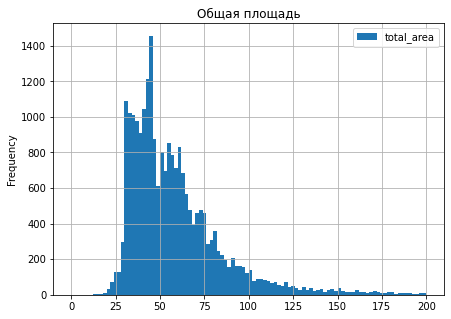

count    23339.000000
mean        58.150947
std         26.512526
min         12.000000
25%         40.000000
50%         51.700000
75%         68.800000
max        200.000000
Name: total_area, dtype: float64

In [31]:
#построим гистограмму по столбцу с общей площадью
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 200), title='Общая площадь')
plt.show()
#сделаем числовое описание данных общей площади
data['total_area'].describe()

По гистограмме видно, что распределение данных является нормальным.

Можно наблюдать, что большинство квартир площадью до 100 метров квадратных. Видим пики на гистограмме в области 30, 40 и 45 метров квадратных - это по нашему предположению могут быть однокомнатные квартиры и их большинство в объявлениях. Далее пик в области 50-65 квадратных метров - это двухкомнатные квартиры.

**Изучим жилую площадь.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения жилой площади меньше 10 метров квадратных.

In [32]:
#посчитаем количество аномальных значений жилой площади менее 10 кв. метров
(data['living_area'] > 10).value_counts()

True     23277
False       62
Name: living_area, dtype: int64

Видим, что таких значений всего 62. Поэтому можем от них избавиться.

In [33]:
#удаляем аномальные значения
data = data[(data['living_area'] >= 10)]

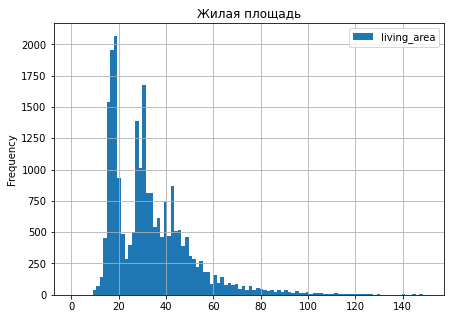

count    23308.000000
mean        33.333024
std         17.272356
min         10.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [34]:
#построим гистограмму по столбцу с жилой площадью
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 150), title='Жилая площадь')
plt.show()
#сделаем числовое описание данных жилой площади
data['living_area'].describe()

На диаграмме видим 3 пика. Они могут быть связаны с тем, что это площади одно-, двух- и трехкомнатных квартир.

Также видим, что большая часть квартир представлена с жилой площадью в диапазоне от 10 до 50 метров квадратных.  

**Изучим площадь кухни.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения площади кухни меньше 5 и более 50 метров квадратных.

In [35]:
#посчитаем количество аномальных значений площади кухни менее 5 и более 50 кв. метров
print((data['kitchen_area'] < 5).value_counts())
print((data['kitchen_area'] > 50).value_counts())

False    22887
True       421
Name: kitchen_area, dtype: int64
False    23281
True        27
Name: kitchen_area, dtype: int64


Видим, что таких значений всего 448. Поэтому можем от них избавиться.

In [36]:
#удаляем аномальные значения
data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 50)]

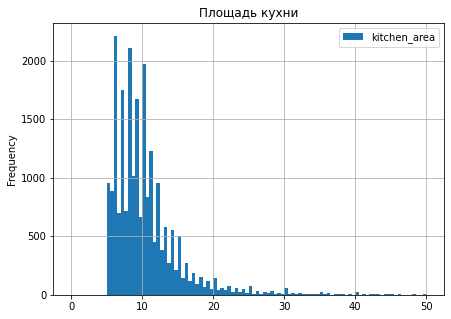

count    22860.000000
mean        10.323201
std          4.969401
min          5.000000
25%          7.000000
50%          9.000000
75%         11.900000
max         50.000000
Name: kitchen_area, dtype: float64

In [37]:
#построим гистограмму по столбцу с площадью кухни
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 50), title='Площадь кухни')
plt.show()
#сделаем числовое описание данных площади кухни
data['kitchen_area'].describe()

Тут видим, что наибольшая часть квартир имеют кухни с площадью в диапазоне с 5 до 15 метров квадратных. Кухни с площадью более 30 метров квадратных встречаются единично.

**Изучим цену объекта.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения стоимости менее 1 млн и более 30 млн рублей.

In [38]:
#посчитаем количество аномальных значений стоимости менее 1 млн и более 30 млн
print((data['last_price'] > 30000000).value_counts())
print((data['last_price'] < 1000000).value_counts())

False    22689
True       171
Name: last_price, dtype: int64
False    22644
True       216
Name: last_price, dtype: int64


Видим, что таких значений всего 374. Поэтому можем от них избавиться.

In [39]:
#удаляем аномальные значения
data = data[(data['last_price'] >= 1000000) & (data['last_price'] <= 30000000)]

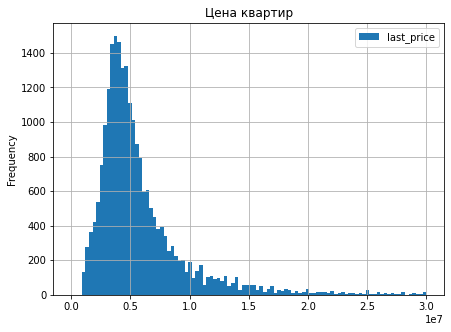

count    22473.000000
mean         5.767475
std          3.890156
min          1.000000
25%          3.500000
50%          4.650000
75%          6.700000
max         30.000000
Name: last_price, dtype: float64


In [40]:
#построим гистограмму по столбцу с ценой
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 30000000), title='Цена квартир')
plt.show()
#поделим данные в столбце last_price на 1 млн для лучшего восприятия и сделаем числовое описание данных стоимости
print((data['last_price'] / 1000000).describe())

Данные по стоимости квартир имеют нормальное распределение. 

Большая часть квартир находится в диапазоне стоимости от 2 до 7,5 миллионов рублей. Самый пик приходится примерно на 4 миллиона. Меньше встречается квартир стоимостью от 10 миллионов. Свыше 20 миллионов - единичные квартиры.

**Изучим количество комнат.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения по количеству комнат больше 7.

In [41]:
#посчитаем количество аномальных значений больше 7 комнат
print((data['rooms'] > 7).value_counts())

False    22470
True         3
Name: rooms, dtype: int64


Видим, что таких значений всего осталось 2. Поэтому можем от них избавиться.

In [42]:
#удаляем аномальные значения
data = data[(data['rooms'] <= 7)]

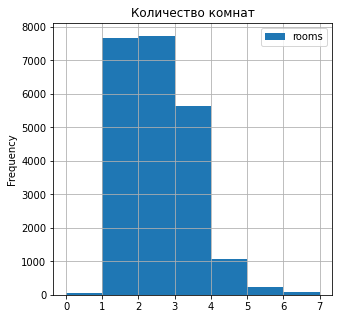

count    22470.000000
mean         2.048509
std          0.974624
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [43]:
#построим гистограмму по столбцу с количеством комнат
data.plot(y='rooms', kind='hist', bins=7, grid=True, figsize=(5, 5), range=(0, 7), title='Количество комнат')
plt.show()
#сделаем числовое описание данных по количеству комнат
data['rooms'].describe()

Распределение по количеству комнат является нормальным.

Большинство квартир имеют 1, 2, 3 комнаты. Меньше квартир имеют больше 4 комнат.

**Изучим высоту потолков.**

Проверим данный параметр на наличие аномальных значений.

Примем, что аномальными являются значения по высоте потолков выше 4 метров.

In [44]:
#посчитаем количество аномальных значений больше 7 комнат
print((data['ceiling_height'] > 4).value_counts())

False    22412
True        58
Name: ceiling_height, dtype: int64


Видим, что таких значений всего осталось 58. Поэтому можем от них избавиться.

In [45]:
#удаляем аномальные значения
data = data[(data['ceiling_height'] <= 4)]

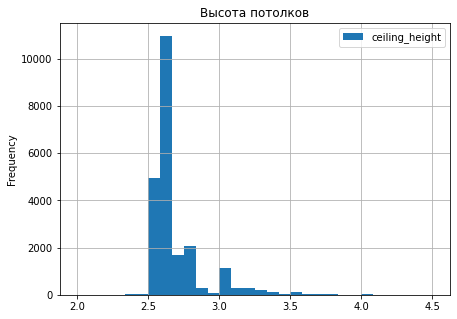

count    22412.000000
mean         2.688203
std          0.197657
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [46]:
#построим гистограмму по столбцу с высотой потолков
data.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(7, 5), range=(2, 4.5), title='Высота потолков')
plt.show()
#сделаем числовое описание данных по высоте потолков
data['ceiling_height'].describe()

На гистограмме видно нормальное распределение данных по высоте потолков. 

Самая распространенная высота потолков от 2,5 до 2,8 метров. Квартиры с высотой потолков выше 3 метров встречаются реже. 

**Изучим типы этажей.**

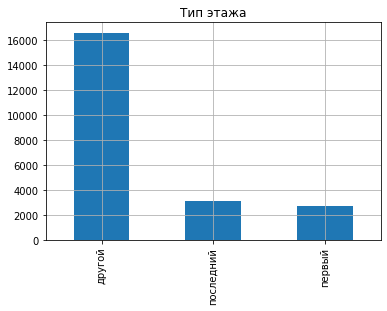

In [47]:
#построим гистограмму по столбцу с типом этажа
data['floor_type'].value_counts().plot(y='floor_type', kind='bar', grid=True, title='Тип этажа')
plt.show()

В предоставленных нам данных больше всего квартир, находящихся на этажах с типом "другой" (т.е. с первого по последний), их около 17500 штук. Квартир, находящихся на первом и последнем этажах примерно одинаковое количество (около 3000 штук).

**Изучим общее количество этажей в домах.**

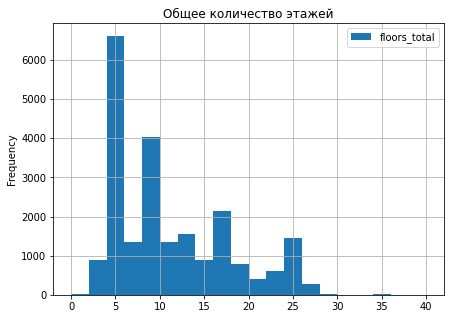

count    22412.000000
mean        10.733759
std          6.562347
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [48]:
#построим гистограмму по столбцу с общим количеством этажей
data.plot(y='floors_total', kind='hist', bins=20, grid=True, figsize=(7, 5), range=(0, 40), title='Общее количество этажей')
plt.show()
#сделаем числовое описание данных по общему количеству этажей
data['floors_total'].describe()

Как видно из гистограммы, общее количество этажей в домах, где находятся квартиры, варьируются от 2 до 25. При этом пики приходятся на такие значения как 5, 9, 17, 25 этажей, остальные представлены меньше. Такое распределение может быть связано с населенным пунктом и с местонахождением жилого комплекса. В поселках этажность домов будет меньше, чем в крупных населенных пунктах. Также отмечаются единичные квартиры, находящиеся в домах с количеством этажей выше 30 - это может быть ошибкой заполнения, а, может, такие высотные дома действительно присутствуют (в больших населенных пунктах).

**Изучим расстояние до центра города в метрах.**

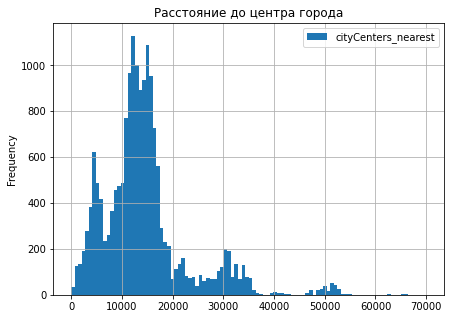

count    17341.000000
mean     14385.569517
std       8578.828645
min        208.000000
25%       9629.000000
50%      13222.000000
75%      16379.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [49]:
#построим гистограмму по столбцу с расстоянием до центра города
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 70000), title='Расстояние до центра города')
plt.show()
#сделаем числовое описание данных по расстоянию до центра города
data['cityCenters_nearest'].describe()

Большая часть квартир в нашей выборке находится от 5000 до 19000 м от центра города. Первый пик приходится на примерно 5000 м от центра города - это могут быть либо небольшие населенные пункты, либо квартиры в больших населенных пунктах, но находящиеся близко к центру. Второй пик приходится на 10000 - 17000 м от центра - это могут быть квартиры в больших городах, либо квартиры в близлежайших к небольшим городам поселках. Есть небольшое количество квартир, находящихся более чем в 30000 м от центра, скорее всего они находятся в поселках, отдаленных от города.

**Изучим расстояние до ближайшего парка.**

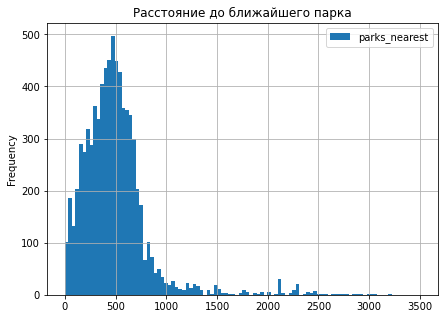

count    7631.000000
mean      493.215830
std       342.689207
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [50]:
#построим гистограмму по столбцу с расстоянием до ближайшего парка
data.plot(y='parks_nearest', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 3500), title='Расстояние до ближайшего парка')
plt.show()
#сделаем числовое описание данных по расстоянию до ближайшего парка
data['parks_nearest'].describe()

На гистограмме видим один пик. Он показывает, что большее количество квартир находится на расстоянии 200 - 750 м от парка.

**Вывод:**

**Общая площадь** большинства квартир до 100 метров квадратных. Видим пики на гистограмме в области 30, 40 и 45 метров квадратных - это по нашему предположению могут быть однокомнатные квартиры и их большинство в объявлениях. Далее пик в области 50-65 квадратных метров - это двухкомнатные квартиры.

**Жилая площадь.** Большая часть квартир представлена с жилой площадью в диапазоне от 10 до 50 метров квадратных. Наблюдаем также нестандартные значения жилой площади, например, слишком маленькие - менее 15 квадратных метров, или более 200 метров квадратных.

**Площадь кухни.** Наибольшая часть квартир имеют кухни с площадью в диапазоне с 5 до 15 метров квадратных. Кухни с площадью более 30 метров квадратных встречаются единично.

**Цена объекта.** Большая часть квартир находится в диапазоне стоимости от 2 до 7,5 миллионов рублей. Самый пик приходится примерно на 4 миллиона. Меньше встречается квартир стоимостью от 10 миллионов. Свыше 20 миллионов - единичные квартиры.

**Количество комнат.** Большинство квартир имеют 1, 2, 3 комнаты. Меньше квартир имеют больше 4 комнат.

**Высота потолков.** Самая распространенная высота потолков от 2,5 до 2,8 метров. Квартиры с высотой потолков выше 3 метров встречаются реже.

**Тип этажа.** Больше всего квартир находятся на этажах с типом "другой" (т.е. с первого по последний), их около 17500 штук. Квартир, находящихся на первом и последнем этажах, примерно одинаковое количество (около 3000 штук).

**Общее количество этажей.** Общее количество этажей в домах, где находятся квартиры, варьируются от 2 до 25. При этом пики приходятся на такие значения как 5, 9, 17, 25 этажей, остальные представлены меньше. Такое распределение может быть связано с населенным пунктом и с местонахождением жилого комплекса. В поселках этажность домов будет меньше, чем в крупных населенных пунктах. Также отмечаются единичные квартиры, находящиеся в домах с количеством этажей выше 30 - это может быть ошибкой заполнения, а, может, такие высотные дома действительно присутствуют (в больших населенных пунктах).

**Расстояние от центра города.** Большая часть квартир в нашей выборке находится от 5000 до 19000 м от центра города. Первый пик приходится на примерно 5000 м от центра города - это могут быть либо небольшие населенные пункты, либо квартиры в больших населенных пунктах, но находящиеся близко к центру. Второй пик приходится на 10000 - 17000 м от центра - это могут быть квартиры в больших городах, либо квартиры в близлежайших к небольшим городам поселках. Есть небольшое количество квартир, находящихся более чем в 30000 м от центра, скорее всего они находятся в поселках, отдаленных от города.

**Расстояние до парка.** Большее количество квартир находится на расстоянии 200 - 750 м от парка.

#### Изучим, как быстро продавались квартиры.  Сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

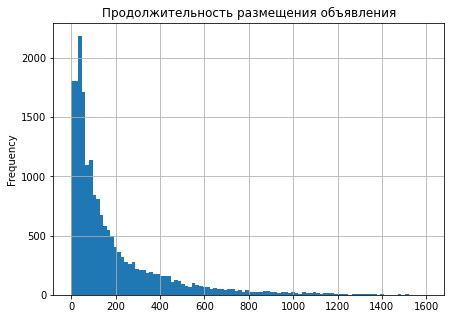

count    19442.000000
mean       180.017848
std        218.508326
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [51]:
#построим гистограмму по столбцу days_exposition
data[data['days_exposition'] !=0]['days_exposition'].plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 1600), title='Продолжительность размещения объявления')
plt.show()
#сделаем числовое описание данных по столбцу days_exposition
data[data['days_exposition'] !=0]['days_exposition'].describe()

In [52]:
#посчитаем медиану и среднее по столбцу days_exposition
print('Медиана:', data[data['days_exposition'] !=0]['days_exposition'].median().round())
print('Cреднее:', data[data['days_exposition'] !=0]['days_exposition'].mean().round())

Медиана: 95.0
Cреднее: 180.0


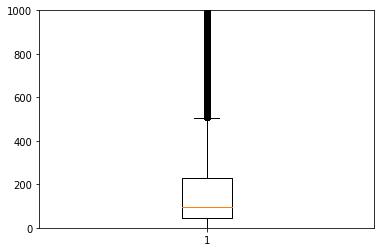

In [53]:
#построим диаграмму размаха
plt.boxplot(data[data['days_exposition'] !=0]['days_exposition'])
plt.ylim(0, 1000)
plt.show()

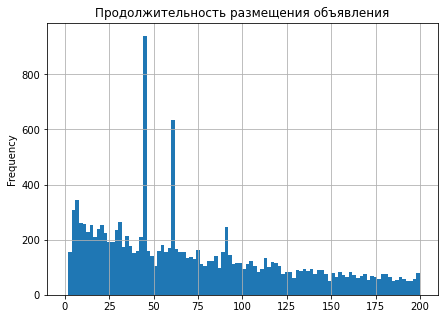

45      813
60      530
7       222
30      200
90      180
       ... 
773       1
757       1
709       1
693       1
1391      1
Name: days_exposition, Length: 1125, dtype: Int64

In [54]:
#построим диаграмму ближе, чтобы рассмотреть выбросы
data[data['days_exposition'] !=0]['days_exposition'].plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(7, 5), range=(0, 200), title='Продолжительность размещения объявления')
plt.show()
data[data['days_exposition'] !=0]['days_exposition'].value_counts()

**Вывод:**

Медианное время продажи квартир 95 дней, среднее - 181 день. На первой гистограмме видно распределение значений близкое к распределению Пуассона.

Время продажи квартир варьируется от 1 дня до 1580 дней. В основном квартиры продаются за срок в 100 дней. При этом из метода describe() мы видим, что межквартильный размах от 1 до 231 дня, а по диаграмме размаха - от 1 до примерно 500 дней. Исходя из этого, можно сказать, что необоснованно быстрых значений у нас не имеется, а необоснованно долгими являются значения от 500 дней и выше.

На гистограмме построенной в промежутке значений от 0 до 200 видим пики в области значений 7, 30, 45, 60, 90 дней. Это может свидетельствовать об об аномалиях. Причинами снятия объявлений в эти дни могут быть правила размещения объявлений на Яндекс.Недвижимось, но также квартиры действительно могли продаваться в этот срок. Прежде, чем избавляться от этих значений необходимо уточнить у сотрудников причины аномальных значений по датам снятия объявлений.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Определим как общая площадь влияет на стоимость объекта.**

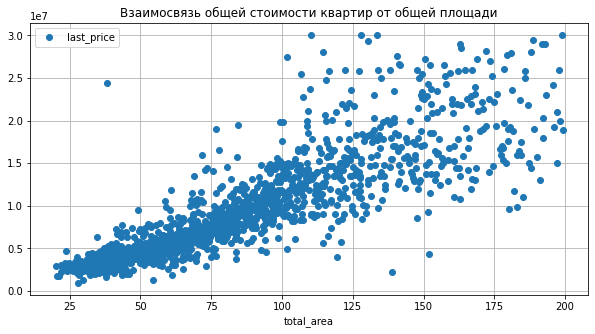

Коэффициент корреляции стоимости и общей площади: 0.7844088815767536


In [55]:
#сделаем cводную таблицу и построим график
(
    data.query('total_area < 200')
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5), title='Взаимосвязь общей стоимости квартир от общей площади')
)
plt.show()

#посчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции стоимости и общей площади:', data['last_price'].corr(data['total_area']))

Исходя из полученных данных, видим, что коэффициент корреляции Пирсона равен 0,78, что показывает прочную взаимосвязь между стоимостью и общей площадью квартир. Взамосвязь является положительной, т.е. с увеличением общей площади увеличивается и стоимость жилья.

**Определим как жилая площадь влияет на стоимость квартир.**

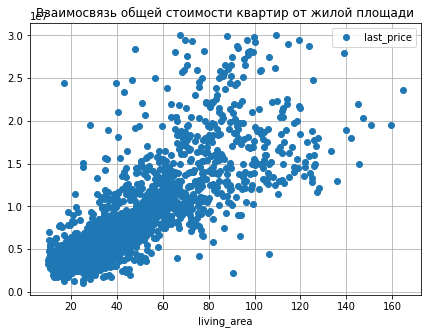

Коэффициент корреляции стоимости и жилой площади: 0.6776883910586777


In [56]:
#сделаем cводную таблицу и построим график
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 5), title='Взаимосвязь общей стоимости квартир от жилой площади')
)
plt.show()

#посчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции стоимости и жилой площади:', data['last_price'].corr(data['living_area']))

Коэффициент корреляции общей стоимости квартиры и жилой площади равен 0,67, что свидетельствует о сильной взаимосвязи между двумя показателями. Взаимосвязь между показателями является положительной - чем больше жилая площадь, тем больше стоимость.

**Определим как площадь кухни влияет на стоимость квартир.**

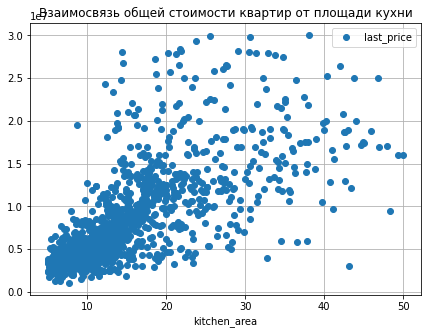

Коэффициент корреляции стоимости и площади кухни: 0.6136680473919114


In [57]:
#сделаем cводную таблицу и построим график
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 5), title='Взаимосвязь общей стоимости квартир от площади кухни')
)
plt.show()

#посчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции стоимости и площади кухни:', data['last_price'].corr(data['kitchen_area']))

При изучении зависимости стоимости жилья от площади кухни наблюдаем, что коэффициент корреляции, равный 0,61, показывает, что связь между этими показателями не очень сильная. При этом взаимосвязь имеет положительный характер. При увеличении площади кухни, стоимость жилья выше.

**Определим как количество комнат влияет на стоимость квартир.**

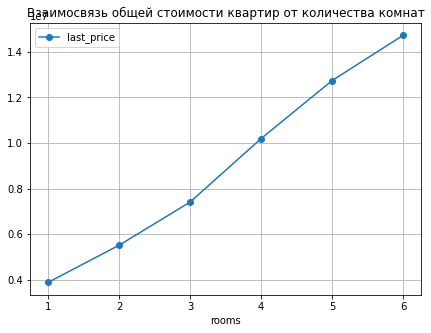

Коэффициент корреляции стоимости и количества комнат: 0.49089407361985854


In [58]:
#сделаем cводную таблицу и построим график
(
    data.query('0 < rooms < 7')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 5), title='Взаимосвязь общей стоимости квартир от количества комнат')
)
plt.show()

#посчитаем коэффициент корреляции Пирсона
print('Коэффициент корреляции стоимости и количества комнат:', data['last_price'].corr(data['rooms']))

Число комнат влияет на общую стоимость жилья: чем больше комнат, тем выше стоимость. При этом связь между этими показателями по коэффициенту корреляции (0,49) является не очень прочной.

**Определим как этаж, на котором расположена квартира, влияет на стоимость квартир.**

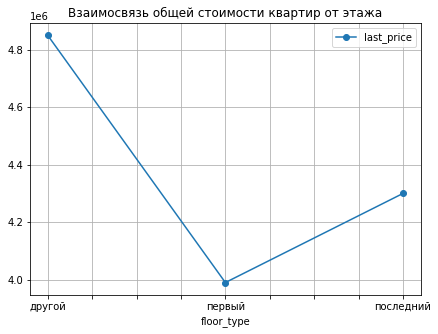

In [59]:
#сделаем cводную таблицу и построим график
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 5), title='Взаимосвязь общей стоимости квартир от этажа')
)
plt.show()

На графике видим, что этаж, на котором расположена квартира, влияет на стоимость жилья. Дешевле квартиры, которые находятся на первом и последнем этажах. Стоимость квартир, находящихся на этажах между первым и последним - выше.

**Определим как даты размещения *(день недели, месяц, год)* влияют на стоимость квартир.**

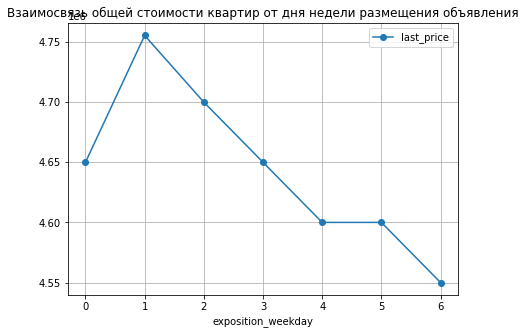

In [60]:
#сделаем cводную таблицу и построим график взаимосвязи дня недели размещения объявления и стоимостью
(
    data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 5), title='Взаимосвязь общей стоимости квартир от дня недели размещения объявления')
)
plt.show()

На графике видим, что квартиры, размещенные во пятницу, субботу и воскресенье самые дешевые, а размещенные во вторник и среду - самые дорогие. В понедельник и четверг видим, что цена совпадает. Возможно, такое распределение стоимости по дням недели размещения объявлений связано с трафиком людей на платформе.

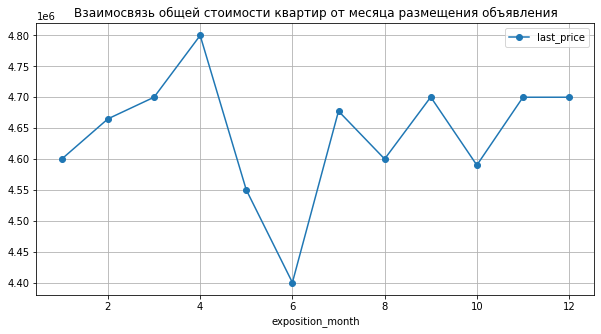

In [61]:
#сделаем cводную таблицу и построим график взаимосвязи месяца размещения объявления и стоимостью
(
    data.pivot_table(index='exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Взаимосвязь общей стоимости квартир от месяца размещения объявления')
)
plt.show()

Что касается месяцев размещения объявлений, наблюдаем, что объявления с самыми дорогими квартирами размещаются в апреле, сентябре и ноябре, а с самыми дешевыми в мае и июне. Это может быть связано с сезонностью рынка недвижимости, изменениями цен за квадратный метр на недвижимость.

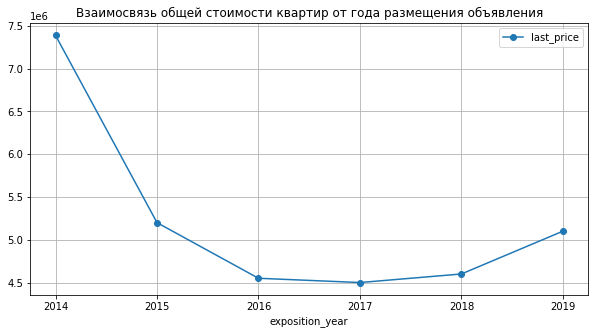

In [62]:
#сделаем cводную таблицу и построим график взаимосвязи года размещения объявления и стоимостью
(
    data.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Взаимосвязь общей стоимости квартир от года размещения объявления')
)
plt.show()

Стоимость квартир с 2014 года начала резко снижаться, с 2016 по 2018 годы оставалась довольно низкой и с 2018 года начала расти. Такая динамика цен может быть связана с кризисом 2014 - 2015 годов.

**Вывод:**

Мы изучили, зависит ли цена квартир от их общей площади, жилой площади, площади кухни, количества комнат, этажа, накотором расположена квартира и даты размещения.

**Общая площадь.** С увеличением общей площади увеличивается и стоимость жилья.

**Жилая площадь.** Взаимосвязь между показателями является положительной - чем больше жилая площадь, тем больше стоимость.

**Площадь кухни.** При увеличении площади кухни, стоимость жилья выше.

**Количество комнат.** Число комнат влияет на общую стоимость жилья: чем больше комнат, тем выше стоимость. При этом связь между этими показателями по коэффициенту корреляции (0,49) является не очень прочной.

**Этаж.** Дешевле квартиры, которые находятся на первом и последнем этажах. Стоимость квартир, находящихся на этажах между первым и последним - выше.

**День размещения объявления.** Квартиры, размещенные во пятницу, субботу и воскресенье самые дешевые, а размещенные во вторник и среду - самые дорогие. В понедельник и четверг видим, что цена совпадает. Возможно, такое распределение стоимости по дням недели размещения объявлений связано с трафиком людей на платформе.

**Месяц размещения объявления.** Объявления с самыми дорогими квартирами размещаются в апреле, сентябре и ноябре, а с самыми дешевыми в мае и июне. Это может быть связано с сезонностью рынка недвижимости, изменениями цен за квадратный метр на недвижимость.

**Год размещения объявления.** Стоимость квартир с 2014 года начала резко снижаться, с 2016 по 2018 годы оставалась довольно низкой и с 2018 года начала расти. Такая динамика цен может быть связана с кризисом 2014 - 2015 годов.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [63]:
#найдем топ-10 населенных пунктов по количеству объявлений
top_ten_cities = data['locality_name'].value_counts().head(10)
display(top_ten_cities)

Санкт-Петербург      14968
поселок Мурино         490
поселок Шушары         429
Всеволожск             390
Пушкин                 357
Колпино                336
поселок Парголово      323
Гатчина                300
деревня Кудрово        270
Выборг                 228
Name: locality_name, dtype: int64

In [64]:
#построим сводную таблицу
locality_pivot = (
    data.query('locality_name in @top_ten_cities.index')
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc=('count', 'mean'))
    .reset_index()
    .round()
    .sort_values(by='mean', ascending=False)
)
locality_pivot.columns = ['Населенный пункт', 'Количество объявлений', 'Средняя цена за квадратный метр']
display(locality_pivot)

print('Максамальная цена за квадратный метр:', locality_pivot['Средняя цена за квадратный метр'].max())
print('Минимальная цена за квадратный метр:', locality_pivot['Средняя цена за квадратный метр'].min())

,Населенный пункт,Количество объявлений,Средняя цена за квадратный метр
5,Санкт-Петербург,14968,110330.0
4,Пушкин,357,102912.0
6,деревня Кудрово,270,91851.0
8,поселок Парголово,323,90429.0
7,поселок Мурино,490,84504.0
9,поселок Шушары,429,78049.0
3,Колпино,336,75240.0
2,Гатчина,300,69052.0
0,Всеволожск,390,68644.0
1,Выборг,228,58360.0


Максамальная цена за квадратный метр: 110330.0
Минимальная цена за квадратный метр: 58360.0


**Вывод:**
Максимальная стоимость за квадратный метр жилья в Санкт-Петербурге, она составляет 110335 рублей, что ожидаемо. Следом идет город Пушкин. Стоимость за квадратный метр в нем составляет 103687 рублей, что может быть связано с тем, что в городе есть много достопримечательностей, садов и парков. Затем идут населенные пункты, непосредственно прилегающие к Санкт-Петербургу. Низкие цены зафиксированы в Гатчине и Всеволожске. Самая минимальная цена (58432 рубля за квадратный метр) в Выборге. Такие низкие цены могут быть связаны с отбаленностью от Санкт-Петербурга.

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.

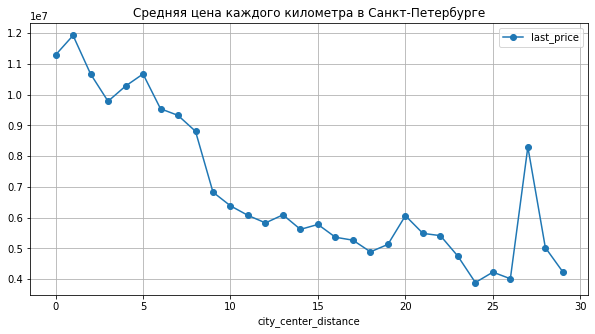

In [65]:
#выделим квартиры в Санкт-Петербурге, построим сводную таблицу и график
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_distance', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Средняя цена каждого километра в Санкт-Петербурге')
)
plt.show()

**Вывод:**
По графику видим, что, в общем, существует тенденция снижения цены при каждом километре удаления от центра. Однако, при 3 км видим резкое снижение цены квартир, а потом до 5 км подъем. Очень непонятное явление. Это может говорить о возможной ошибке при внесении данных - необходимо уточнить у сотрудников. Тем не менее, центральной можно считать область до 7 км.

### Общий вывод

Итак, мы провели исследование объявлений о продаже квартир. На основании чего установили параметры, которые влияют на стоимость квартир.

Для начала мы изучили все данные. Выявили, что во многих столбцах были пропуски и неверно определены типы данных. Мы, впоследствии, провели над этим работу. Выявили пропуски в столбцах balcony, parks_around3000, ponds_around3000 и заменили их на 0, т.к. количество парков, водоемов и балконов не указано продавцом, в связи с тем, что их нет. В столбце days_exposition пропуски решили оставить, т.к. эти объявления еще не сняты и квартира не продана. В столбце is_apartment произвели замену пропусков на False, потому что, апартаменты, скорее всего, появились в нашем списке совсем недавно, относительно остальных данных. В столбце с общим количеством этажей выявленные пропуски было решено удалить, т.к. их очень мало и на результат исследования это не повлияет. Пропуски в столбце с высотой потолков заменили медианным значением, т.к. нашли в нем некоторое количество аномальных значений, а медиана более устойчива к выбросам. В столбцах living_area и kitchen area произвели замену пропусков, рассчитав жилую площадь и площадь кухни на основании среднего процента жилой площади и кухни, соответственно, от общей площади.
Произвели замену типа данных в столбце first_day_exposition со строчного на datetime. Столбцы floors_total, balcony, parks_around3000, ponds_around3000, days_exposition привели к типу int, т.к. эти данные выражаются только целыми числами. Столбец is_apartment привели к типу bool, вместо object.
В столбце с названиями населенных пунктов нашли дубликаты, произвели их замену и пропуски решили удалить, в связи с малым количеством.

Для удобства исследования в наш датафрейм добавили следующие столбцы:

•	цена одного квадратного метра (square_meter_price);

•	день недели публикации объявления (exposition_weekday);

•	месяц публикации объявления (exposition_month);

•	год публикации объявления (exposition_year);

•	тип этажа квартиры (floor_type);

•	расстояние до центра города в км (city_center_distance).

Изучив основные параметры, выявили, что:

**Общая площадь** большинства квартир до 100 метров квадратных. Видим пики на гистограмме в области 30, 40 и 45 метров квадратных - это по нашему предположению могут быть однокомнатные квартиры и их большинство в объявлениях. Далее пик в области 50-65 квадратных метров - это двухкомнатные квартиры.

**Жилая площадь.** Большая часть квартир представлена с жилой площадью в диапазоне от 10 до 50 метров квадратных. 

**Площадь кухни.** Наибольшая часть квартир имеют кухни с площадью в диапазоне с 5 до 15 метров квадратных. Кухни с площадью более 30 метров квадратных встречаются единично.

**Цена объекта.** Большая часть квартир находится в диапазоне стоимости от 2 до 7,5 миллионов рублей. Самый пик приходится примерно на 4 миллиона. Меньше встречается квартир стоимостью от 10 миллионов. Свыше 20 миллионов - единичные квартиры.

**Количество комнат.** Большинство квартир имеют 1, 2, 3 комнаты. Меньше квартир имеют больше 4 комнат.

**Высота потолков.** Самая распространенная высота потолков от 2,5 до 2,8 метров. Квартиры с высотой потолков выше 3 метров встречаются реже.

**Тип этажа.** Больше всего квартир находятся на этажах с типом "другой" (т.е. с первого по последний), их около 17500 штук. Квартир, находящихся на первом и последнем этажах, примерно одинаковое количество (около 3000 штук).

**Общее количество этажей.** Общее количество этажей в домах, где находятся квартиры, варьируются от 2 до 25. При этом пики приходятся на такие значения как 5, 9, 17, 25 этажей, остальные представлены меньше. Такое распределение может быть связано с населенным пунктом и с местонахождением жилого комплекса. В поселках этажность домов будет меньше, чем в крупных населенных пунктах. Также отмечаются единичные квартиры, находящиеся в домах с количеством этажей выше 30 - это может быть ошибкой заполнения, а, может, такие высотные дома действительно присутствуют (в больших населенных пунктах).

**Расстояние от центра города.** Большая часть квартир в нашей выборке находится от 5000 до 19000 м от центра города. Первый пик приходится на примерно 5000 м от центра города - это могут быть либо небольшие населенные пункты, либо квартиры в больших населенных пунктах, но находящиеся близко к центру. Второй пик приходится на 10000 - 17000 м от центра - это могут быть квартиры в больших городах, либо квартиры в близлежащих к небольшим городам поселках. Есть небольшое количество квартир, находящихся более чем в 30000 м от центра, скорее всего они находятся в поселках, отдаленных от города.

**Расстояние до парка.** Большее количество квартир находится на расстоянии 200 - 750 м от парка.

Проанализировав *сроки продажи квартир*, увидели, что квартиры продавались в общем от 1 до 1580 дней. В основном квартиры продаются за срок в 100 дней. Межквартильный размах от 1 до 231 дня, а по диаграмме размаха - от 1 до примерно 500 дней. Исходя из этого, можно сказать, что необоснованно быстрых значений у нас не имеется, а необоснованно долгими являются значения от 500 дней и выше.

Мы изучили, *зависит ли цена квартир от их общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира и даты размещения*. 
Взаимосвязь между показателями общей площади, жилой площади, площади кухни, количества комнат и стоимостью являестя положительной, т.е. чем больше показатель, тем выше цена. При этом взаимосвязь стоимости с общей, жилой площадью и площадью кухни является сильной, а с количеством комнат менее прочной. 
Также стоимость квартиры зависит от этажа, на котором она находится. Дешевле квартиры на первом и последнем этажах, на остальных этажах квартиры дороже.
Квартиры, размещенные во пятницу, субботу и воскресенье самые дешевые, а размещенные во вторник и среду - самые дорогие. В понедельник и четверг видим, что цена совпадает. Возможно, такое распределение стоимости по дням недели размещения объявлений связано с трафиком людей на платформе.
Объявления с самыми дорогими квартирами размещаются в апреле, сентябре и ноябре, а с самыми дешевыми в мае и июне. Это может быть связано с сезонностью рынка недвижимости, изменениями цен за квадратный метр на недвижимость.
Стоимость квартир с 2014 года начала резко снижаться, с 2016 по 2018 годы оставалась довольно низкой и с 2018 года начала расти. Такая динамика цен может быть связана с кризисом 2014 - 2015 годов.

*Максимальная стоимость за квадратный метр жилья* в Санкт-Петербурге, она составляет 110335 рублей, что ожидаемо. Следом идет город Пушкин. Стоимость за квадратный метр в нем составляет 103687 рублей, что может быть связано с тем, что в городе есть много достопримечательностей, садов и парков. Затем идут населенные пункты, непосредственно прилегающие к Санкт-Петербургу. Низкие цены зафиксированы в Гатчине и Всеволожске. *Самая минимальная цена* (58432 рубля за квадратный метр) в Выборге. Такие низкие цены могут быть связаны с отбаленностью от Санкт-Петербурга.

Рассмотрев *стоимость квартир в Санкт-Петербурге* выявили, что существует тенденция снижения цены при каждом километре удаления от центра. Однако, при 3 км видим резкое снижение цены квартир, а потом до 5 км подъем. Очень непонятное явление. Это может говорить о возможной ошибке при внесении данных - необходимо уточнить у сотрудников. Тем не менее, центральной можно считать область до 7 км.